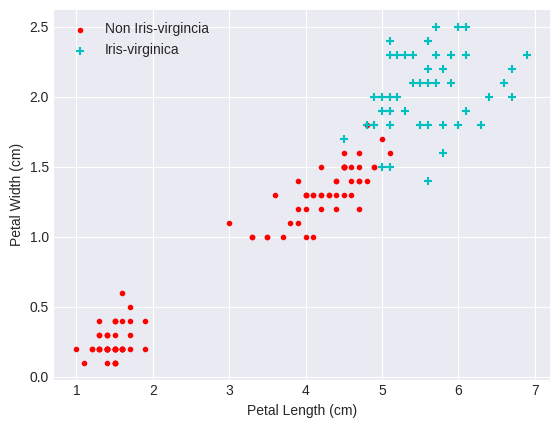

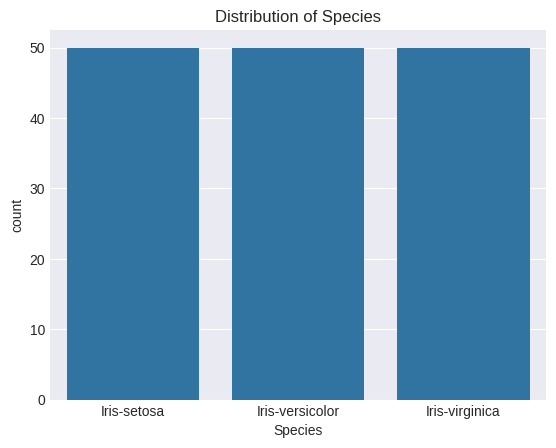

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter("error", RuntimeWarning)
dataFrame = pd.read_csv("./Iris.csv")
data = dataFrame.to_numpy()
columns = dataFrame.columns
features = columns[1:-1]
plt.style.use('seaborn-v0_8-darkgrid')

def sigmoid(z):
    z = z.astype(float)
    return 1 / (1 + np.exp(-z))

def compute_cost(x,y,w,b):
    z = np.dot(x,w)+b
    z = z.astype(float)
    n = len(z)
    s = sigmoid(z)
    cost = -np.sum(y * np.log(s) + (1 - y) * np.log(1 - s))
    cost /= n
    return cost

def compute_gradient(x, y,w ,b):
    samples,features = x.shape
    z = np.dot(x,w)+b
    s = sigmoid(z)
    dj_dw = np.zeros(features)
    dj_db = 0.
    for i in range(samples):
        for j in range(features):
            dj_dw[j] += ((s[i] - y[i]) * x[i,j])/samples
        dj_db += (s[i] - y[i])/samples
    return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, iters):
    cost_history = []
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        try:
            cost = compute_cost(x,y,w,b)
            cost_history.append(cost)
        except:
            print("z=1 => log0")
    plt.plot(cost_history,c='r')
    plt.legend(["cost vs iterations"])
    plt.xlabel("iterations")
    plt.ylabel("cost function")
    plt.show()
    return w, b

def apply_threshold(y_pred, threshold_val):
    n = len(y_pred)
    rounded_val = np.zeros(n)
    for i in range(n):
        if y_pred[i] >= threshold_val:
            rounded_val[i] = 1
        else:
            rounded_val[i] = 0
    return rounded_val

plt.scatter(data[0:100, 3], data[0:100, 4], marker='.', c='r')
plt.scatter(data[100:150, 3], data[100:150, 4], marker='+', c='c')
plt.legend(['Non Iris-virgincia', 'Iris-virginica'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

sns.countplot(x='Species',data=dataFrame)
plt.title("Distribution of Species")
plt.show()

3.143687507569307


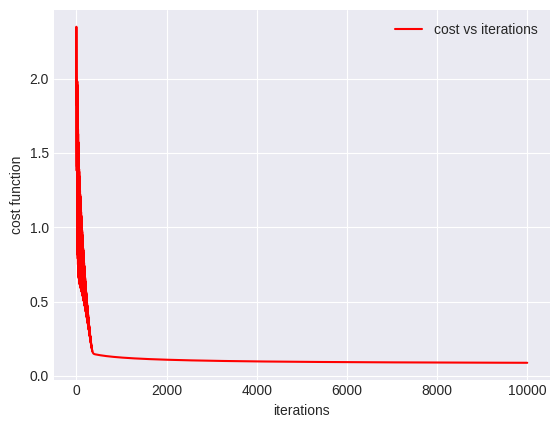

0.08873364039931757
w = [3.80248486 7.89057629] and b = -31.586634569897228 .


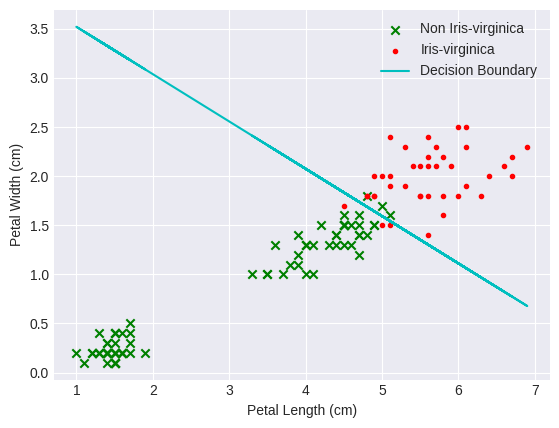

In [3]:
d1 = data[0:40,3:5]
d2 = data[50:90,3:5]
class_0_data1 = np.concatenate((d1,d2))
d3 = data[100:140,3:5]
dataSet1 = np.concatenate((class_0_data1,d3))
a = np.zeros(80)
b = np.array([1] * 40)
Y1 = np.concatenate((a, b))
w = np.array([1, 1])
b = 1
print(compute_cost(dataSet1, Y1, w, b))

w_pred, b_pred = gradient_descent(dataSet1, Y1, w, b,1,10000)
print(compute_cost(dataSet1, Y1, w_pred, b_pred))
w_dataSet1, b_dataSet1 = w_pred, b_pred
print(f"w = {w_dataSet1} and b = {b_dataSet1} .")
plt.scatter(class_0_data1[:,0],class_0_data1[:,1], marker='x', c='g')
plt.scatter(d3[:, 0], d3[:, 1], marker='.', c='r')
x_2 = (-w_dataSet1[0] * dataSet1[:, 0] - b_dataSet1) / w_dataSet1[1]
plt.plot(dataSet1[:, 0], x_2, c='c')
plt.legend(['Non Iris-virginica','Iris-virginica', 'Decision Boundary'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

In [13]:
# Sample data for species 1 and 2 for testing
a = np.zeros(20)
b = np.array([1] * 10)
Y_true_1 = np.concatenate((a, b))

sd1 = data[40:50,3:5]
sd2 = data[90:100,3:5]
sd3 = data[140:,3:5]
sample_data_1 = np.concatenate((sd1,sd2,sd3))
y_predicted_1 = np.dot(sample_data_1, w_dataSet1) + b_dataSet1
sigmoid_y_1 = sigmoid(y_predicted_1)
# Call apply threshold function for the above sample data
y_predicted_1 = apply_threshold(sigmoid_y_1, 0.5)
print(f"Predicted values for sample dataset: {y_predicted_1}")

[2.86395820e-11 2.86395820e-11 1.30101799e-11 9.55952370e-10
 6.17289605e-10 4.18896271e-11 4.07101552e-11 1.90293135e-11
 2.78331871e-11 1.90293135e-11 4.55479456e-03 4.52867117e-02
 9.98753209e-04 1.44059008e-05 4.68613960e-03 2.13424324e-03
 4.68613960e-03 6.83934475e-03 1.01345902e-05 3.20862986e-03
 9.99823967e-01 9.97412220e-01 9.42574860e-01 9.99876154e-01
 9.99945321e-01 9.98229307e-01 9.18180971e-01 9.81429562e-01
 9.99171537e-01 8.81746661e-01]
Predicted values for sample dataset: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


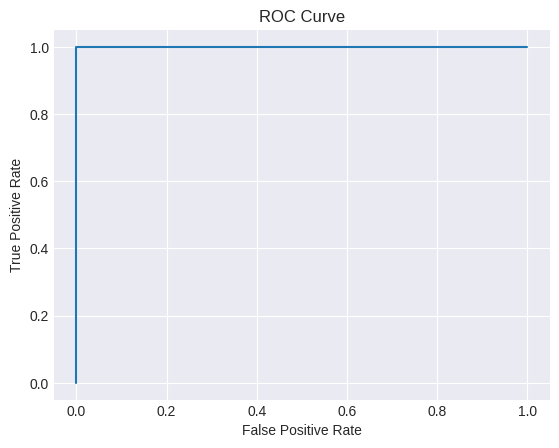

AUC-ROC: -1.0


In [20]:
def calculate_metrics(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    tp = np.sum((y_true == 1) & (y_pred_binary == 1))
    fp = np.sum((y_true == 0) & (y_pred_binary == 1))
    tn = np.sum((y_true == 0) & (y_pred_binary == 0))
    fn = np.sum((y_true == 1) & (y_pred_binary == 0))
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1_score
    

def roc_curve(y_true, y_pred_prob):
    thresholds = np.linspace(0, 1,100)
    tpr_list = []
    fpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred_prob > threshold).astype(int)
        tp = np.sum((y_true == 1) & (y_pred_binary == 1))
        fp = np.sum((y_true == 0) & (y_pred_binary == 1))
        tn = np.sum((y_true == 0) & (y_pred_binary == 0))
        fn = np.sum((y_true == 1) & (y_pred_binary == 0))
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

def auc_roc_curve(tpr, fpr):
    auc = np.trapz(tpr, fpr)
    return auc

# Calculate metrics
accuracy, precision, recall, f1_score = calculate_metrics(Y_true_1,sigmoid_y_1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Calculate ROC curve
tpr_list, fpr_list = roc_curve(Y_true_1,sigmoid_y_1)

# Calculate AUC-ROC
auc = auc_roc_curve(tpr_list, fpr_list)

# Plot ROC curve
plt.plot(fpr_list, tpr_list)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(f'AUC-ROC: {auc}')
